In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
#Importing Dataset and extracting the Independent and Dependent Variables
companies = pd.read_csv('1000_Companies.csv')
x = companies.iloc[:, :-1].values #x cotains all rows except last column
y = companies.iloc[:, 4].values #y contains all rows of 4th column i.e profit column which will be predicted by our model

companies.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

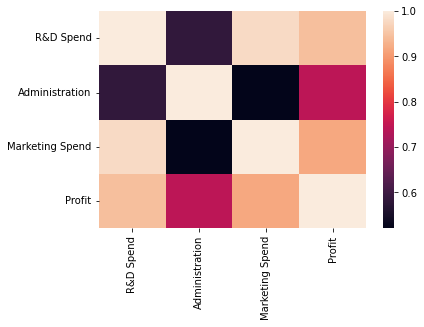

In [113]:
#Data Visualization
#Building the correlation matrix

sns.heatmap(companies.corr())

In [114]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])  #transforming 3rd column(i.e State column) data into numeric values
 
#onehotencoder = OneHotEncoder(categorical_features = [3]) this line will not work  because latest build of sklearn 
#library removed categorical_features parameter so we use following code :

ct = ColumnTransformer([('State', OneHotEncoder(), [3])], remainder = 'passthrough')
x = ct.fit_transform(x)

print(x[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [115]:
#Avoiding Dumy variable
x = x[:, 1:]


In [116]:
#Spllitting the dataset into Training set and Testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 , random_state = 0)

In [117]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [118]:
#predicting the test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[ 89394.23575034  88027.95819517  94508.53314457 175549.39580411
  83150.97998076 110365.61149629 131468.83716136  91080.37178898
 164499.09125684  52845.80977359  66508.01269671 150384.61048743
 126593.26898994  58880.41811176 177293.42838502  75039.2984996
 118001.51199867 164327.97934562 174978.3486738  182006.18783198
 124009.89479313  85265.30904178 180871.77326231  83737.38254066
 104639.96676191 100860.13285751  55972.52100482  56567.46734375
  68458.11806781 211528.90031709 120537.16479697 111372.47323668
 101263.40023154 137751.91749039  63521.80637151 108499.76514776
 185959.70818605 171302.67161101 174510.71530106 117423.7029346
  96497.33588967 165207.59035383 107363.92335611  49811.4527348
 116263.78584195  58173.63390515 158250.37929294  78215.23575465
 159564.20687057 130917.09063892 184767.68475625 174475.46214047
  93357.21436254  78070.21614566 180680.32254511  84147.23613675
 142703.70618687 170532.55216598  84106.25650591 105090.52500577
 141460.38501846  52204.6654

In [119]:
#Calculating the coefficients
print(regressor.coef_)

[-7.89616003e+02 -5.51149301e+02  5.26047095e-01  9.78530820e-01
  9.80946128e-02]


In [120]:
#calculating the Intercept
print(regressor.intercept_)

-65676.83905538137


In [121]:
#calculating the R squared value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9311120236268362

In [ ]:
#Success !!! Our predicted profit value with 93% accuraccy